In [1]:
import qqespm_module as qq
from PIL import Image
import base64
import io

In [2]:
pois = qq.read_df_csv(data_dir='data/london_pois_bbox_100perc.csv')
pois.shape

(127975, 10)

In [3]:
pois.head()

,osm_id,name,amenity,shop,tourism,landuse,leisure,building,geometry,centroid
0,991607788,Kensington West,NaN,NaN,NaN,NaN,NaN,apartments,"POLYGON ((-0.21319 51.49516, -0.21326 51.49520...",POINT (-0.21296 51.49553)
1,154951930,NaN,NaN,NaN,NaN,NaN,NaN,residential,"POLYGON ((-0.18174 51.52468, -0.18175 51.52468...",POINT (-0.18177 51.52474)
2,669557409,NaN,NaN,NaN,NaN,NaN,NaN,residential,"POLYGON ((-0.14745 51.52154, -0.14746 51.52155...",POINT (-0.14742 51.52158)
3,249217389,Moscos Cafe,cafe,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-0.15393 51.51315, -0.15396 51.51317...",POINT (-0.15378 51.51322)
4,149065743,No 74 Hair & Beauty,NaN,hairdresser,NaN,NaN,NaN,NaN,"POLYGON ((-0.10270 51.52439, -0.10270 51.52437...",POINT (-0.10277 51.52443)


In [7]:
from calculateCircumferencePoints import calculateCircumferencePoints
import matplotlib.pyplot as plt
import networkx as nx
import qqespm_module as qq

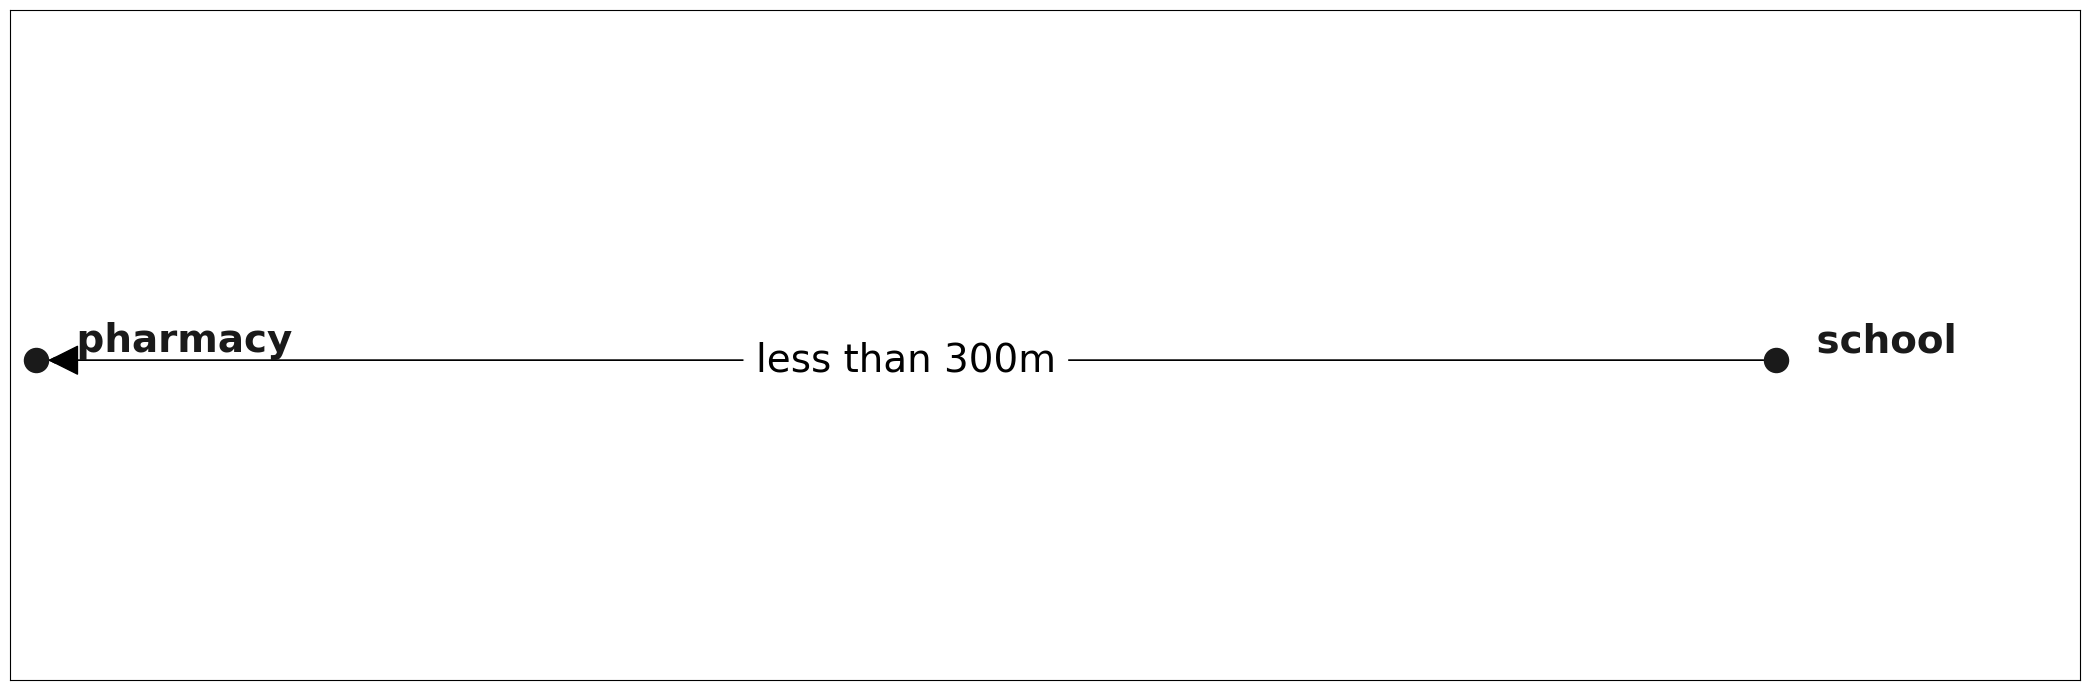

In [8]:
v0 = qq.SpatialVertex(0,'school')
v1 = qq.SpatialVertex(1, 'pharmacy')
e01 = qq.SpatialEdge('0-1', v0, v1, 0, 300)
sp = qq.SpatialPatternGraph([v0,v1], [e01])
sp.plot()

In [10]:
nx.circular_layout(sp.to_networkx())

{'   school': array([1.00000000e+00, 4.37113883e-08]),
 '   pharmacy': array([-1.00000000e+00, -4.37113883e-08])}

In [5]:
G = nx.complete_graph(3)
nx.circular_layout(G)

{0: array([1.00000000e+00, 1.98682151e-08]),
 1: array([-0.50000007,  0.86602542]),
 2: array([-0.49999993, -0.86602544])}

In [ ]:
nx.circular_layout(G)

In [13]:
circumf_points = calculateCircumferencePoints(len(sp.vertices))

In [15]:
circumf_points = calculateCircumferencePoints(len(sp.vertices))
vertices_layout = {'   '+v.keyword: circumf_points[i] for i, v in enumerate(sp.vertices) }
vertices_layout

{'   school': [-1.0, 1.2246467991473532e-16],
 '   pharmacy': [1.0, -2.4492935982947064e-16]}

In [8]:
xs, ys = list(zip(*calculateCircumferencePoints(4)))

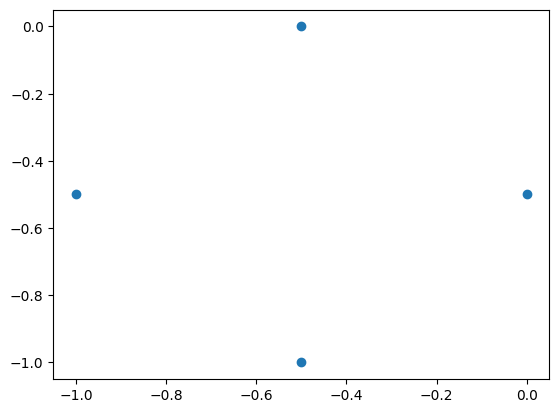

In [9]:
plt.scatter(xs, ys)

In [11]:
pois_freqs = sorted(list({
    **pois['amenity'].value_counts()[pois['amenity'].value_counts()>=10].to_dict(),
    **pois['shop'].value_counts()[pois['shop'].value_counts()>=10].to_dict(),
    **pois['tourism'].value_counts()[pois['tourism'].value_counts()>=5].to_dict(),
    **pois['landuse'].value_counts()[pois['landuse'].value_counts()>=5].to_dict(),
    **pois['leisure'].value_counts()[pois['leisure'].value_counts()>=5].to_dict(),
    **pois['building'].value_counts()[pois['building'].value_counts()>=5].to_dict(),
}.items()), key=lambda e: e[1], reverse=True)
ordered_poi_types = list(zip(*pois_freqs))[0]
ordered_poi_types

('residential',
 'bicycle_parking',
 'apartments',
 'terrace',
 'bench',
 'restaurant',
 'cafe',
 'commercial',
 'grass',
 'retail',
 'fast_food',
 'garden',
 'clothes',
 'post_box',
 'telephone',
 'pitch',
 'semidetached_house',
 'convenience',
 'waste_basket',
 'hairdresser',
 'office',
 'garages',
 'playground',
 'school',
 'motorcycle_parking',
 'park',
 'bicycle_rental',
 'place_of_worship',
 'bar',
 'information',
 'beauty',
 'artwork',
 'garage',
 'atm',
 'recycling',
 'dry_cleaning',
 'church',
 'vacant',
 'pharmacy',
 'industrial',
 'bank',
 'jewelry',
 'dentist',
 'car_sharing',
 'university',
 'roof',
 'fitness_centre',
 'shoes',
 'gift',
 'railway',
 'bookmaker',
 'newsagent',
 'art',
 'supermarket',
 'bakery',
 'flowerbed',
 'attraction',
 'picnic_table',
 'furniture',
 'religious',
 'charging_station',
 'community_centre',
 'gallery',
 'optician',
 'fountain',
 'service',
 'doctors',
 'parking_space',
 'vending_machine',
 'mobile_phone',
 'shed',
 'hospital',
 'charity',


In [16]:
print(str(ordered_poi_types).replace("'", '"').replace(', ', ',\n'))

("residential",
"bicycle_parking",
"apartments",
"terrace",
"bench",
"restaurant",
"cafe",
"commercial",
"grass",
"retail",
"fast_food",
"garden",
"clothes",
"post_box",
"telephone",
"pitch",
"semidetached_house",
"convenience",
"waste_basket",
"hairdresser",
"office",
"garages",
"playground",
"school",
"motorcycle_parking",
"park",
"bicycle_rental",
"place_of_worship",
"bar",
"information",
"beauty",
"artwork",
"garage",
"atm",
"recycling",
"dry_cleaning",
"church",
"vacant",
"pharmacy",
"industrial",
"bank",
"jewelry",
"dentist",
"car_sharing",
"university",
"roof",
"fitness_centre",
"shoes",
"gift",
"railway",
"bookmaker",
"newsagent",
"art",
"supermarket",
"bakery",
"flowerbed",
"attraction",
"picnic_table",
"furniture",
"religious",
"charging_station",
"community_centre",
"gallery",
"optician",
"fountain",
"service",
"doctors",
"parking_space",
"vending_machine",
"mobile_phone",
"shed",
"hospital",
"charity",
"antiques",
"drinking_water",
"train_station",
"books",
"post_office",
"

In [19]:
img = Image.open('myfile.png')

img_byte_arr = io.BytesIO()
img.save(img_byte_arr, format='PNG')
data = img_byte_arr.getvalue()

data = base64.encodebytes(data)

In [20]:
type(data)

bytes

In [8]:
data = base64.b64encode(data).decode()   

In [21]:
len(data)

120274

In [2]:
v1 = qq.SpatialVertex(0, 'school')
v2 = qq.SpatialVertex(1, 'bakery')
v3 = qq.SpatialVertex(2, 'restaurant')

e23 = qq.SpatialEdge('1-2', v2, v3, 356, 2918, '>')
e12 = qq.SpatialEdge('0-1', v1, v2, 0, 1000)

sp = qq.SpatialPatternGraph([v1,v2,v3], [e23, e12])

In [3]:
print(sp.to_json(indent = 2))

{
  "vertices": [
    {
      "id": 0,
      "keyword": "school"
    },
    {
      "id": 1,
      "keyword": "bakery"
    },
    {
      "id": 2,
      "keyword": "restaurant"
    }
  ],
  "edges": [
    {
      "id": "0-1",
      "vi": 0,
      "vj": 1,
      "lij": 0,
      "uij": 1000,
      "sign": "-",
      "relation": null
    },
    {
      "id": "1-2",
      "vi": 1,
      "vj": 2,
      "lij": 356,
      "uij": 2918,
      "sign": ">",
      "relation": null
    }
  ]
}


In [4]:
print(sp.to_json())

{"vertices": [{"id": 0, "keyword": "school"}, {"id": 1, "keyword": "bakery"}, {"id": 2, "keyword": "restaurant"}], "edges": [{"id": "0-1", "vi": 0, "vj": 1, "lij": 0, "uij": 1000, "sign": "-", "relation": null}, {"id": "1-2", "vi": 1, "vj": 2, "lij": 356, "uij": 2918, "sign": ">", "relation": null}]}
